In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
datasets = {'CIFAR100':10,'PMNIST':10,'SplitMNIST':5}
models = ['EWC']
seeds = [1,2,3,4,5]
data = pd.DataFrame([],columns=['Order','Dataset','ACC','FM','index','model'])
for dataset in datasets.keys():
    for model in models:
        path = os.path.join('../results',dataset,'{}_{}_{}_overall.csv'.format('CNN',model,datasets[dataset]))
        result = np.loadtxt(path,delimiter=',',dtype=np.str_)
        for i in range(result.shape[0]):
            data.loc[data.shape[0]] = ['{} {}'.format("Order",result[i,3]),dataset,float(result[i,0]),float(result[i,1]),result[i,4],model]

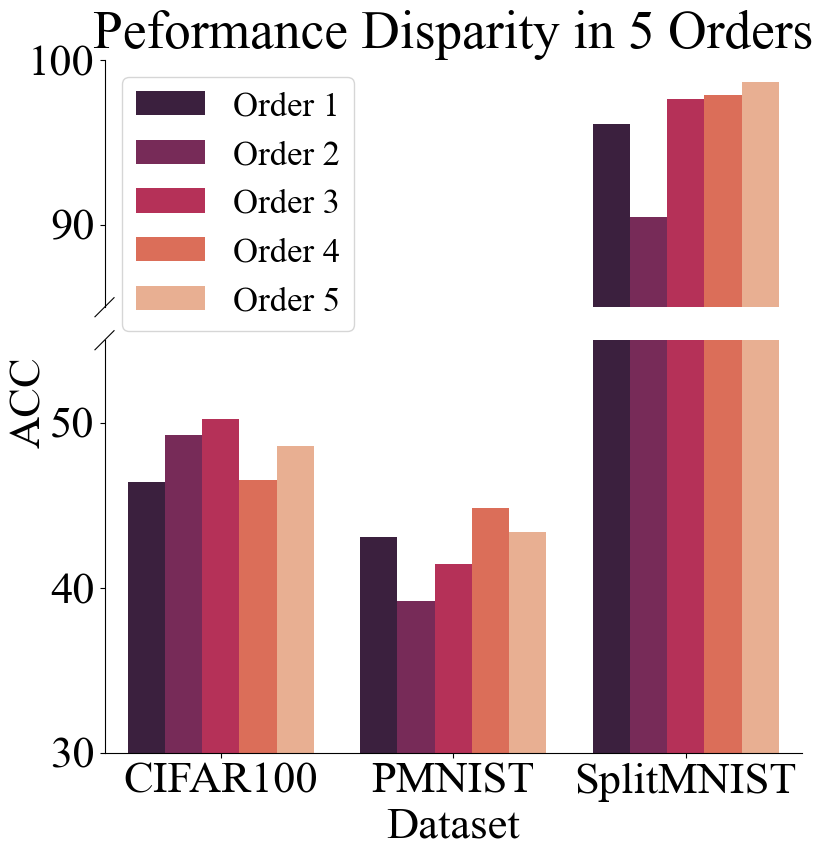

In [8]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np
plt.rc('font',family='Times New Roman')
plt.rcParams.update({"font.size":32})

fig = plt.figure(figsize=(9, 9))
bax = brokenaxes(ylims=((30, 55), (85, 100)), hspace=.1)

ax1, ax2 = bax.axs
upper = sns.barplot(data=data,x='Dataset',y='ACC',hue='Order', palette="rocket", ax = ax1)
sns.barplot(data=data,x='Dataset',y='ACC',hue='Order', palette="rocket", ax = ax2)
ax2.get_legend().remove()
upper.legend(fontsize=25)
# ax1.get_legend(fontsize=20)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
plt.title("Peformance Disparity in 5 Orders")
fig.text(0.02, 0.5, 'ACC', va='center', rotation='vertical')
plt.savefig('order.pdf')